In [1]:
from ROOT import TCanvas
from ROOT import TH1F
from ROOT import gStyle
from array import array
import math
import numpy as np
import random
import time

c1 = TCanvas( 'c1', 'Random Number Generator', 0, 0, 1200, 1000 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )
c1.Divide(2,2)

Welcome to JupyROOT 6.16/00


In [2]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    a = 16807
    m = 2147483647
    b = 0
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

In [3]:
npoints = 1000000
centroid = 0
sigma = 1
iseed = 1
nbins = 1000
width = 12.0*sigma
dx = width/nbins
n_randoms = 0

gStyle.SetOptFit(1)

seedLCG(iseed)
h1 = TH1F("h1","Random Number Generation",nbins,centroid-width/2.0,centroid+width/2.0)
h2 = TH1F("h2","Random Number Generation",nbins,centroid+width/12.0,centroid+width/12.0+width/12.0)
h3 = TH1F("h3","Random Number Generation",nbins,centroid-width/2.0,centroid+width/2.0)
h4 = TH1F("h4","Random Number Generation",nbins,centroid+width/12.0,centroid+width/12.0+width/12.0)

random.seed(iseed)

ticks1 = time.time()
for i in range(0,npoints):
    check = True
    while (check):
        r1 = rand_ejb()
        n_randoms = n_randoms + 1
        x = (centroid-width/2.0+width*r1)
        pgauss = math.exp(-1.0*(x-centroid)*(x-centroid)/(2.0*sigma*sigma))
        r2 = rand_ejb()
        n_randoms = n_randoms+1
        if (r2<pgauss):
            check = False
            
    #print (i,r)
    h1.Fill(x,1.0/width/math.sqrt(2.0*3.14159265*sigma*sigma))
    h2.Fill(x,12.0/width/math.sqrt(2.0*3.14159265*sigma*sigma))
ticks2 = time.time()
print ('elapsed time = %.3f' % (ticks2-ticks1))
    
ticks3 = time.time()
for i in range(0,npoints):
    xp = random.gauss(centroid,sigma)
    h3.Fill(xp)
    h4.Fill(xp)
ticks4 = time.time()
print ('elapsed time = %.3f' % (ticks4-ticks3))

elapsed time = 7.951
elapsed time = 2.286


Total number of randoms generated = 9578536
Uncertainty in the mean = 0.001000
 FCN=765.253 FROM MIGRAD    STATUS=CONVERGED      55 CALLS          56 TOTAL
                     EDM=2.01334e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.59326e+02   1.95322e-01   2.15423e-03  -3.00868e-04
   2  Mean         3.72847e-04   9.98943e-04   1.35020e-05   6.32308e-01
   3  Sigma        9.98244e-01   7.07901e-04   2.60526e-06  -2.96955e-01
 FCN=732.765 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=6.37246e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.78915e+03   5.85580e+00   6.33674e-02   6.47017e-06
   2  Mean        -1.46470e

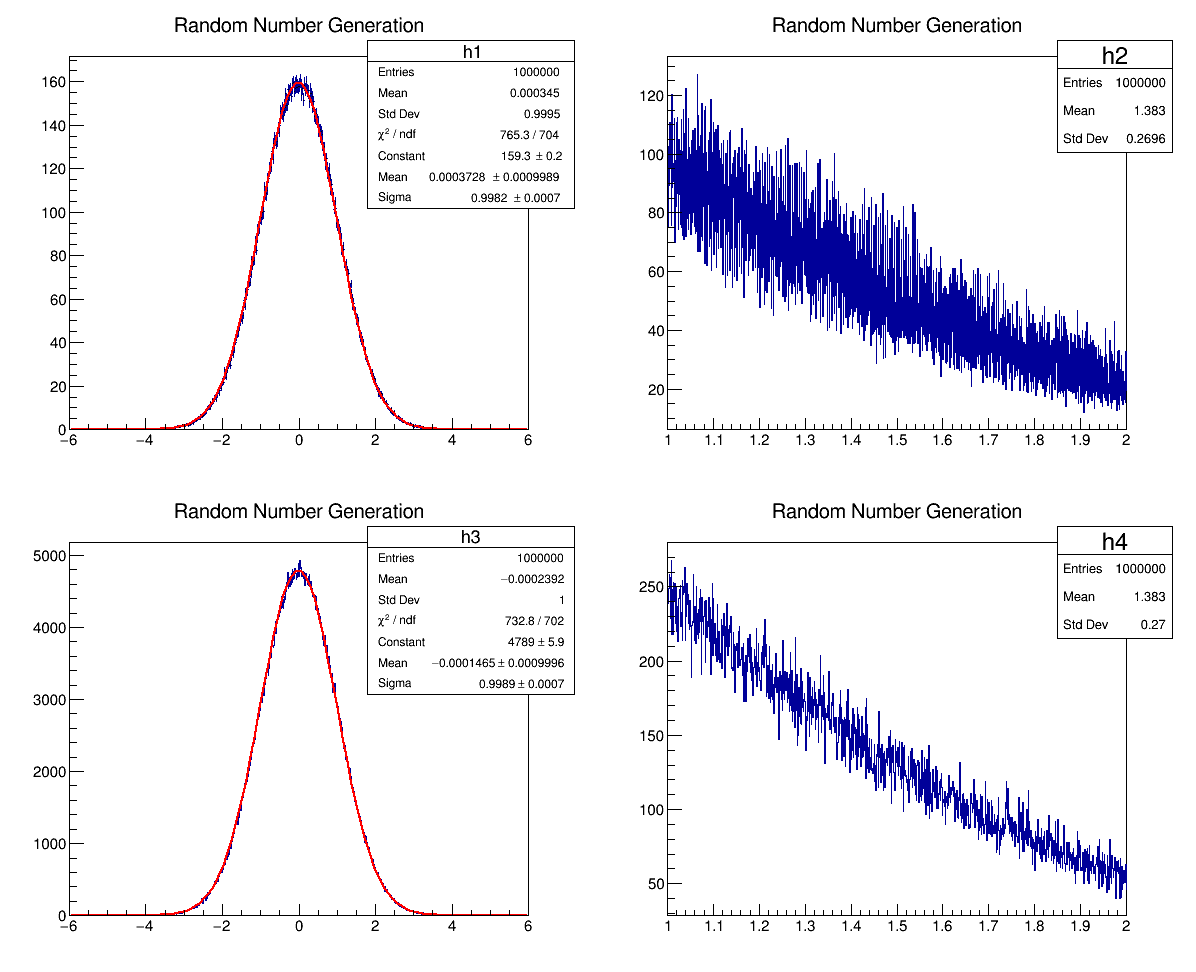

In [4]:
print("Total number of randoms generated = %d" % n_randoms)
print("Uncertainty in the mean = %f" % (sigma/math.sqrt(npoints)))

c1.cd(1)
h1.Fit("gaus")
h1.Draw()
c1.cd(2)
h2.Draw("HIST")
c1.Draw()
c1.cd(3)
h3.Fit("gaus")
h3.Draw()
c1.cd(4)
h4.Draw("HIST")
c1.Draw()